Goal: Usind data about strokes, build a predictor of which conditions are most likely to result in a sroke.

In [114]:
import pandas as pd
from pandas import DataFrame as df
from config import CONFIG

In [115]:
# EDA
data_loca= CONFIG["DATA_FILEPATH"]
child_bmi_data = CONFIG["CHILD_BMI"]
data = pd.read_csv(data_loca)
child_bmi_df = pd.read_csv(child_bmi_data)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [166]:
data_df[data_df["age"] == 2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
437,5010,Female,2.0,0,0,No,children,Rural,92.48,18.0,Unknown,0
562,45238,Female,2.0,0,0,No,children,Urban,58.26,16.5,Unknown,0
607,9906,Female,2.0,0,0,No,children,Urban,102.34,17.0,Unknown,0
683,15274,Female,2.0,0,0,No,children,Rural,79.89,31.6,Unknown,0
684,53016,Female,2.0,0,0,No,children,Urban,130.61,14.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4600,50804,Male,2.0,0,0,No,children,Rural,65.84,16.1,Unknown,0
4657,21852,Male,2.0,0,0,No,children,Rural,96.47,19.5,Unknown,0
4842,47383,Male,2.0,0,0,No,children,Urban,153.31,17.1,Unknown,0
4961,3720,Female,2.0,0,0,No,children,Rural,80.30,21.2,Unknown,0


In [116]:
len(data)

5110

In [117]:
data_df = data.dropna()
len(data_df)

4909

In [118]:
# round ages to nearest int
data_df["age"] = data_df["age"].round()

/var/folders/18/918s5vr16kl9091zgnswr5gm0000gn/T/ipykernel_13677/4176842324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["age"] = data_df["age"].round()


In [138]:
# can't calc bmi for ages below 3
data_df = data_df[data_df["age"] > 1]

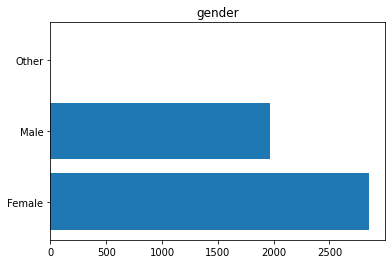

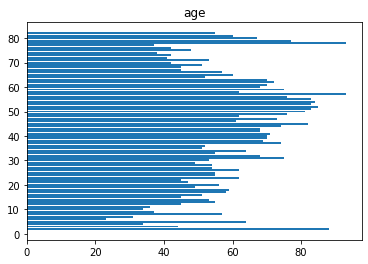

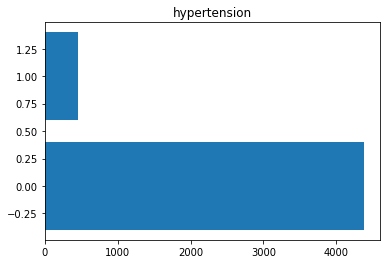

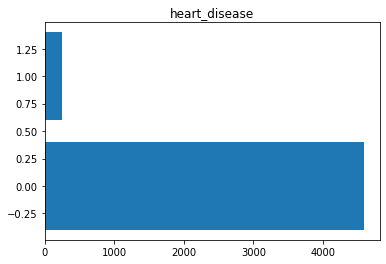

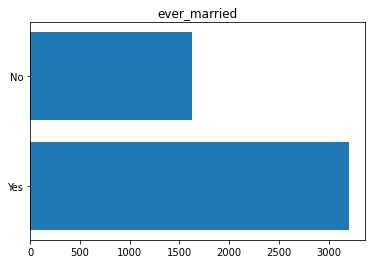

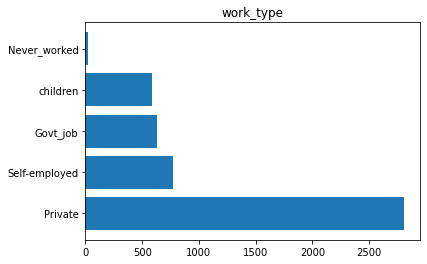

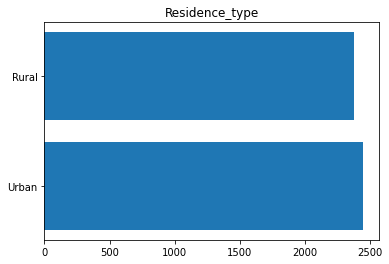

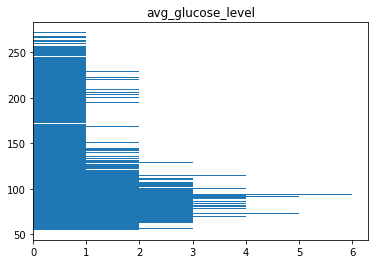

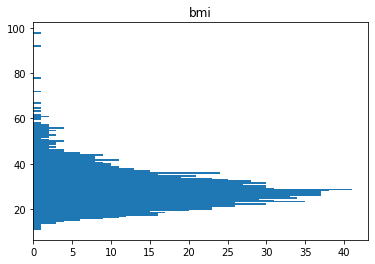

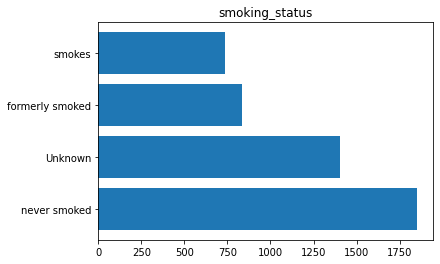

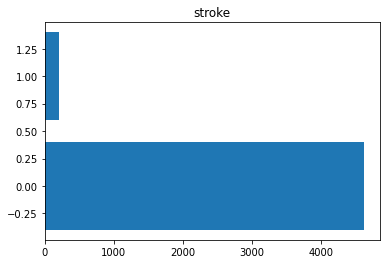

In [140]:
# get histograms of all data to see spread
import matplotlib.pyplot as plt
cols = ["gender", "age", "hypertension", "heart_disease","ever_married", "work_type","Residence_type", "avg_glucose_level","bmi","smoking_status","stroke"]
for col in cols:
    # counts = data_df[col].value_counts().plot.barh()
    # fig, ax = plt.subplots()
    # ax.set_title(f"{col}")
    # plt.show()

    categories = data_df[col].value_counts().index
    counts = data_df[col].value_counts().values
    plt.barh(categories, counts)
    plt.title(col)
    plt.show()


These files contain the L, M, and S parameters needed to generate exact percentiles and z-scores along with the percentile values for the 3rd, 5th, 10th, 25th, 50th, 75th, 90th, 95th, and 97th percentiles by sex (1=male; 2=female) and single month of age. The smoothed 85th percentile values are included in the BMI-for-age and weight-for-stature tables. Age is listed at the half month point for the entire month; for example, 1.5 months represents 1.0-1.99 months or 1.0 month up to but not including 2.0 months of age. The only exception is birth, which represents the point at birth. To obtain L, M, and S values at finer age or length/stature intervals interpolation could be used.

The LMS parameters are the median (M), the generalized coefficient of variation (S), and the power in the Box-Cox transformation (L). To obtain the value (X) of a given physical measurement at a particular z-score or percentile, use the following equation:

X = M (1 + LSZ)**(1/L), L ≠ 0

Or

X = M exp(SZ), L = 0

where the L, M, and S are the values from the appropriate table corresponding to the age in months of the child (** indicates an exponent, such that M(1+LSZ)**(1/L) means raising (1+LSZ) to the (1/L)th power and then multiplying the M; exp(X) is the exponentiation function, e to the power X). Z is the z-score that corresponds to the percentile. z-scores correspond exactly to percentiles, e.g., z-scores of -1.881, -1.645, -1.282, -0.674, 0, 0.674, 1.036, 1.282, 1.645, and 1.881 correspond to the 3rd, 5th, 10th, 25th, 50th, 75th, 85th, 90th, 95th, and 97th percentiles, respectively.

For example, to obtain the 5th percentile of weight-for-age for a 9-month-old male, we would look up the L, M and S values from the WTAGEINF table, which are L=-0.1600954, M=9.476500305, and S=0.11218624. For the 5th percentile, we would use Z=-1.645. Using the equation above, we calculate that the 5th percentile is 7.90 kg.

To obtain the z-score (Z) and corresponding percentile for a given measurement (X), use the following equation:

((X/M)**L) – 1
Z = ————————-, L≠0
LS

or

Z = ln(X/M)/S ,L=0

where X is the physical measurement (e.g. weight, length, head circumference, stature or calculated BMI value) and L, M and S are the values from the appropriate table corresponding to the age in months of the child (or length/stature). (X/M)**L means raising the quantity (X/M) to the Lth power.

For example, to obtain the weight-for-age z-score of a 9-month-old male who weighs 9.7 kg, we would look up the L, M and S values from the WTAGEINF table, which are L=-0.1600954, M=9.476500305, and S=0.11218624. Using the equation above, we calculate that the z-score for this child is 0.207. This z-score corresponds to the 58th percentile.

Z-scores and corresponding percentiles can be obtained from standard normal distribution tables found in statistics text books. Standard normal tables can also be found on the internet by doing a search on a “standard normal table.” In addition, many computer programs have pre-existing functions that convert Z-scores to percentiles and vice versa.



In [145]:
data_df[data_df["bmi"] > 65]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [141]:
child_bmi_df.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P85,P90,P95,P97
0,1,24.0,-2.01118107,16.57502768,0.080592465,14.52095333,14.73731947,15.09032827,15.74164233,16.57502768,17.55718781,18.16219473,18.60948128,19.33801062,19.85985812
1,1,24.5,-1.982373595,16.54777487,0.080127429,14.50347667,14.71929257,15.07117474,15.71962876,16.54777487,17.52129279,18.11954923,18.56110634,19.27889813,19.79194014
2,1,25.5,-1.924100169,16.49442763,0.079233994,14.46882381,14.68360841,15.03335725,15.67634464,16.49442763,17.45135039,18.03668013,18.46729593,19.16465965,19.66102345
3,1,26.5,-1.86549793,16.44259552,0.078389356,14.43459737,14.64843329,14.99619505,15.634035,16.44259552,17.38383656,17.95700228,18.37736191,19.05567423,19.5365754
4,1,27.5,-1.807261899,16.3922434,0.077593501,14.40082828,14.61378626,14.95969047,15.5926798,16.3922434,17.3187102,17.88047101,18.29125345,18.9518675,19.41848805


In [147]:
child_bmi_df.describe()

,Sex,Agemos
count,438.000000,438.000000
mean,1.500000,132.495434
std,0.500572,63.275812
min,1.000000,24.000000
25%,1.000000,77.750000
50%,1.500000,132.500000
75%,2.000000,187.250000
max,2.000000,240.500000


In [146]:
# child_bmi_df[child_bmi_df["Sex"] == "Sex"]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P85,P90,P95,P97


In [143]:
# child_bmi_df = child_bmi_df.drop(index = 219)

KeyError: '[219] not found in axis'

In [148]:
child_bmi_df["Sex"].unique()

array([1, 2])

In [149]:
sorted(data_df["age"].astype(int).unique())

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82]

In [ ]:
# child_bmi_df["Sex"] = child_bmi_df["Sex"].astype(int)
# child_bmi_df["Agemos"] = child_bmi_df["Agemos"].astype(float)

In [177]:
child_bmi_df = child_bmi_df.astype(float)

In [179]:
child_bmi_df["Sex"] = child_bmi_df["Sex"].astype(int)

In [180]:
child_bmi_df

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P85,P90,P95,P97
0,1,24.0,-2.011181,16.575028,0.080592,14.520953,14.737319,15.090328,15.741642,16.575028,17.557188,18.162195,18.609481,19.338011,19.859858
1,1,24.5,-1.982374,16.547775,0.080127,14.503477,14.719293,15.071175,15.719629,16.547775,17.521293,18.119549,18.561106,19.278898,19.791940
2,1,25.5,-1.924100,16.494428,0.079234,14.468824,14.683608,15.033357,15.676345,16.494428,17.451350,18.036680,18.467296,19.164660,19.661023
3,1,26.5,-1.865498,16.442596,0.078389,14.434597,14.648433,14.996195,15.634035,16.442596,17.383837,17.957002,18.377362,19.055674,19.536575
4,1,27.5,-1.807262,16.392243,0.077594,14.400828,14.613786,14.959690,15.592680,16.392243,17.318710,17.880471,18.291253,18.951867,19.418488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2,237.5,-2.353501,21.689489,0.151755,17.435152,17.822557,18.480142,19.788872,21.689489,24.384258,26.397231,28.130338,31.596640,34.818095
435,2,238.5,-2.350529,21.701083,0.152221,17.434275,17.822591,18.481819,19.794202,21.701083,24.406856,26.429839,28.172905,31.663237,34.912504
436,2,239.5,-2.346962,21.711892,0.152716,17.431988,17.821267,18.482230,19.798457,21.711892,24.429104,26.462429,28.215745,31.730686,35.008306
437,2,240.0,-2.344958,21.716999,0.152975,17.430311,17.820090,18.481956,19.800176,21.716999,24.440096,26.478720,28.237271,31.764743,35.056751


In [185]:
def get_bmi_bucket(bmi_table, data_table):
# def calculate_Z(bmi_table, data_table):
    """
    Calcuate BMI categories provided bmi lookup table and a dataframe of bmi values.

    Calculate Z based on the provided formula and return a dataframe of Z values.
    """
    def get_row(gender, age):
        """
        Used to lookup rows in bmi table.
        Output: 
            Single row df.
        """
        age_mask = bmi_table["Agemos"] == age
        gender_mask = bmi_table["Sex"] == gender
        
        lookup_row = bmi_table[age_mask & gender_mask]
        
        return lookup_row
    # Define a function to calculate Z
    def bucket_adult_bmi(bmi):

        if bmi < 18.5:
            bmi_bucket = "under weight"
        elif 18.5 <= bmi <= 24.9:
            bmi_bucket = "healthy weight" 
        elif 25.0 <= bmi <=  29.9:
            bmi_bucket = "over weight" 
        else:
            bmi_bucket = "obese" 

        return bmi_bucket

    def bucket_child_bmi(bmi, lookup_row):

        c_under = bmi < lookup_row["P5"].item()
        c_healthy = lookup_row["P5"].item() <= bmi < lookup_row["P85"].item()
        c_over = lookup_row["P85"].item() <= bmi < lookup_row["P95"].item()
        c_obese = bmi >= lookup_row["P95"].item()


        if c_under:
            bmi_bucket = "under weight"
        elif c_healthy:
            bmi_bucket = "healthy weight" 
        elif c_over:
            bmi_bucket = "over weight" 
        else:
            bmi_bucket = "obese" 
        
        return bmi_bucket

    # Create an empty list to store Z values
    bmi_buckets = []

    # Iterate through each row in the data_table
    for index, row in data_table.iterrows():
        gender = 1 if row['gender'] == "Male" else 2
        age = row["age"]
        bmi = row['bmi']
        
        # convert ages below 21 to age in months
        if age < 21:
            age_in_months = age * 12
            age = age_in_months + 0.5 if age_in_months not in [24,240] else age_in_months
        

        # Get the relevant row from the bmi_table
        lookup_row = get_row(gender, age)

        if not lookup_row.empty:
            bucket = bucket_child_bmi(bmi, lookup_row)
        else:
            # Handle the case where no lookup row is found
            bucket = bucket_adult_bmi(bmi)

        bmi_buckets.append(bucket)

    # Add Z_values to the data_table and return as a new dataframe
    data_table['bmi_buckets'] = bmi_buckets
    return data_table

In [155]:
# import math
# def calc_bmi_percentile(data_table, bmi_table):
#     """
#     This is a function that calculates the percentile of a child's BMI and returns their weight category.
#     Input:
#         Age; int()
#         BMI; int()
#         lookup_row; data to use in percentile calculation

#     Output:
#         weight_category
#     """

#     # function that returns L,M,S
#     def get_row(bmi_table, gender, age):
#         """
#         Used to lookup rows in bmi table.
#         Output: 
#             Single row df.
#         """

#         code_gender = 1 if gender == "Male" else 2
#         age_in_yrs = age * 12
#         # code_age = age_in_yrs + 0.5 if age_in_yrs/24 not in [1,10] else age_in_yrs
#         code_age = age_in_yrs + 0.5 if age_in_yrs not in [24,240] else age_in_yrs

#         #age is between 0 and 100
#         # if age < 21, code the age unless
#         age_mask = bmi_table["Agemos"] == code_age if age < 21 else age
#         gender_mask = bmi_table["Sex"] == code_gender
        
#         lookup_row = bmi_table[age_mask & gender_mask]
        
#         return lookup_row

#     gender = data_row["gender"]
#     age = data_row["age"]
#     lookup_row = get_row(bmi_table = lookup_table, gender = gender, age = age)
    
#     bmi = data_row["bmi"]
#     L = lookup_row["L"]
#     M = lookup_row["M"]
#     S = lookup_row["S"]

#     Z = ((bmi/M)**L)-1 / (L*S) if L != 0 else math.log(X/M)/L
#     percentile = mean + Z*std


#     c_under = percentile < 5
#     c_healthy = 5 <= percentile < 85
#     c_over = 85 <= percentile < 95
#     c_obese = percentile >= 95

#     if c_under:
#         weight_category = "under weight"
#     elif c_healthy:
#        weight_category = "healthy weight" 
#     elif c_over:
#        weight_category = "over weight" 
#     else:
#        weight_category = "obese" 
    
#     return weight_category

In [186]:
# bmi_cat = calc_bmi_percentile(categories, child_bmi_df)
new_df = get_bmi_bucket(data_table = data_df, bmi_table =child_bmi_df )
new_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_buckets
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,healthy weight
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,over weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,healthy weight
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,obese
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,obese
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,over weight


In [ ]:
# bucket age 10 year buckets
